In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

In [43]:
df = pd.read_csv('../../../antoniovbranco/Project/winemag-data-130k-v2.csv')

In [44]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Cleaning the data

In [45]:
# Dropping useless columns: 'id', 'taster_name', 'taster_twitter_handle'
df.drop(columns = ['id', 'taster_name', 'taster_twitter_handle'], inplace = True)

df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [46]:
# Checking for null values in region_1 and region_2

print(f"There are {df['region_1'].isna().sum()} null values for region_1")
print(f"There are {df['region_2'].isna().sum()} null values for region_2")

There are 21247 null values for region_1
There are 79460 null values for region_2


In [47]:
#Replacing region_1 and region_2 NaN values with empty strings

df['region_1'].fillna('', inplace = True)
df['region_2'].fillna('', inplace = True)

/tmp/ipykernel_32501/890220599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region_1'].fillna('', inplace = True)
/tmp/ipykernel_32501/890220599.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [48]:
# Merging region_1 and region_2 columns into a new region column (and dropping the former)

new_col = df['region_1']+', '+df['region_2']

df.insert(loc = 6, column = 'region', value = new_col)

df.drop(columns = ['region_1', 'region_2'], inplace = True)

df.head()

,country,description,designation,points,price,province,region,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,"Etna,",Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,",",Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [49]:
# Replacing null region values with empty strings

df['region'].replace(', ', '', inplace = True)

df.head()

/tmp/ipykernel_32501/1231311008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace(', ', '', inplace = True)


,country,description,designation,points,price,province,region,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,"Etna,",Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [50]:
# Checking for null values in the designation column

print(f"There are {df['designation'].isna().sum()} null values in the designation column")
print(f"This accounts for {round(100*df['designation'].isna().sum()/len(df), 2)}% of our data")
print('I suggest dropping this column')

There are 37465 null values in the designation column
This accounts for 28.83% of our data
I suggest dropping this column


In [51]:
# Dropping the designation column

df.drop(columns = ['designation'], inplace = True)

df.head()

,country,description,points,price,province,region,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,"Etna,",Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Inspecting the country data

In [52]:
df['country'].value_counts(dropna = False)

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
NaN                          63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16


In [53]:
print(f"There are {len(df['country'].unique())} countries in total")

There are 44 countries in total


In [54]:
top_15_percent = round(100*df['country'].value_counts(dropna = False)[:15].sum()/len(df), 2)

print(f"The top 15 countries in the dataset represent {top_15_percent}% of the wines\n")

print('The top 15 countries are:')
for i in range(15):
  print(f"{i+1} - {df['country'].value_counts(dropna = False).index[i]}")

The top 15 countries in the dataset represent 98.97% of the wines

The top 15 countries are:
1 - US
2 - France
3 - Italy
4 - Spain
5 - Portugal
6 - Chile
7 - Argentina
8 - Austria
9 - Australia
10 - Germany
11 - New Zealand
12 - South Africa
13 - Israel
14 - Greece
15 - Canada


In [55]:
# Using only wines from the top 15 countries
top_15_countries = list(df['country'].value_counts()[:15].index)

indices = []

for country in top_15_countries:
  idx = list(df[df['country'] == country].index)
  indices += idx

df = df.loc[indices]

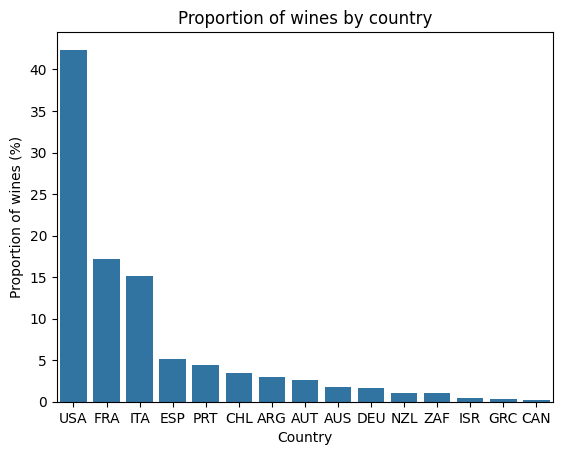

In [56]:
# Plotting distribution of wines from the top 15 countries
names = ['USA', 'FRA', 'ITA', 'ESP', 'PRT', 'CHL', 'ARG', 'AUT', 'AUS', 'DEU', 'NZL', 'ZAF', 'ISR', 'GRC', 'CAN']

sns.barplot(x = names,
            y = 100*df['country'].value_counts()/len(df))

plt.title('Proportion of wines by country')
plt.ylabel('Proportion of wines (%)')
plt.xlabel('Country');

In [57]:
print(f'The US is overrepresented in the dataset, accounting for {round(100*df["country"].value_counts()[0]/len(df), 2)}% of the wines')

The US is overrepresented in the dataset, accounting for 42.37% of the wines


/tmp/ipykernel_32501/2626854249.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The US is overrepresented in the dataset, accounting for {round(100*df["country"].value_counts()[0]/len(df), 2)}% of the wines')


Since the US wines are over-represented, we want to cut these down. We can start by looking at the distibution of scores for US wines, and taking only the top 50% best-scoring US wines

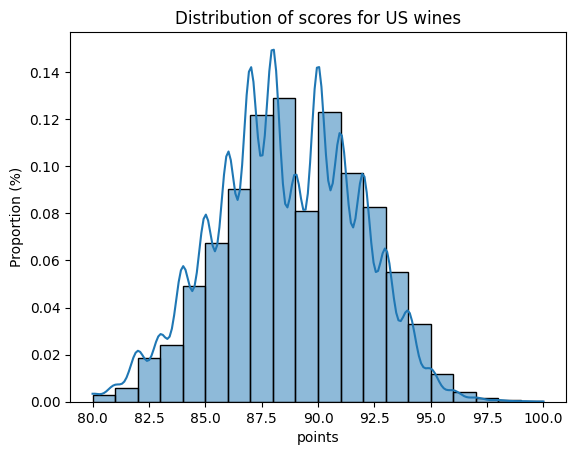

In [58]:
# Looking at the distribution of scores for US wines

sns.histplot(df[df['country'] == 'US']['points'],
             kde = True,
             stat = 'proportion',
             bins = 20)

plt.ylabel('Proportion (%)')
plt.title('Distribution of scores for US wines');

In [59]:
# Finding the 60th percentile for US wine scores
df[df['country'] == 'US']['points'].quantile(0.6)

90.0

In [60]:
# Removing the lowest-scoring 60% of US wines
worst_US_wines_indices = list(df[df['country'] == 'US'][df['points'] < 90.0].index)

df.drop(index = worst_US_wines_indices, inplace = True)

/tmp/ipykernel_32501/1352491258.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  worst_US_wines_indices = list(df[df['country'] == 'US'][df['points'] < 90.0].index)


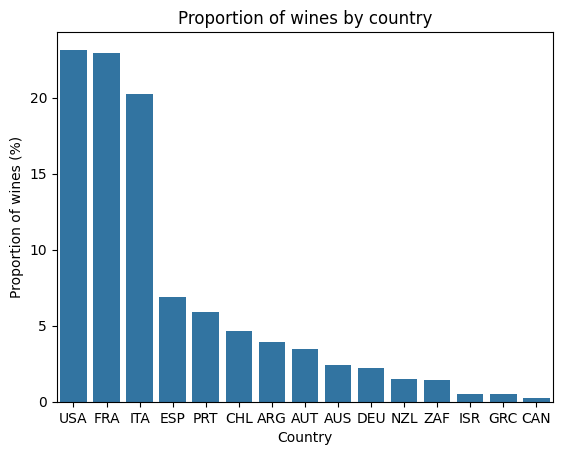

In [61]:
# Looking at the new distribution of wines by country

sns.barplot(x = names,
            y = 100*df['country'].value_counts()/len(df))

plt.xlabel('Country')
plt.ylabel('Proportion of wines (%)')
plt.title('Proportion of wines by country');

In [63]:
print(f"We now have {len(df)} wines in the dataset")

We now have 96453 wines in the dataset


Now we can see that US, French, and Italian wines are over-represented, we can take only the remaining 50% best scoring of these wines

In [66]:
# Finding the median scores for each of these countries

US_med = df[df['country'] == 'US']['points'].quantile(0.5)
FR_med = df[df['country'] == 'France']['points'].quantile(0.5)
ITA_med = df[df['country'] == 'Italy']['points'].quantile(0.5)

print(f"Median scores for the US: {US_med},\nFrance: {FR_med},\nItaly: {ITA_med}")

Median scores for the US: 91.0,
France: 89.0,
Italy: 88.0


In [67]:
# Dropping the worst-scoring 50% of these wines

worst_US_wines_indices_new = list(df[df['country'] == 'US'][df['points'] < US_med].index)
worst_FR_wines_indices = list(df[df['country'] == 'France'][df['points'] < FR_med].index)
worst_ITA_wines_indices = list(df[df['country'] == 'Italy'][df['points'] < ITA_med].index)

worst_indices = worst_US_wines_indices_new + worst_FR_wines_indices + worst_ITA_wines_indices

df.drop(index = worst_indices, inplace = True)

/tmp/ipykernel_32501/2597929370.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  worst_US_wines_indices_new = list(df[df['country'] == 'US'][df['points'] < US_med].index)
/tmp/ipykernel_32501/2597929370.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  worst_FR_wines_indices = list(df[df['country'] == 'France'][df['points'] < FR_med].index)
/tmp/ipykernel_32501/2597929370.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  worst_ITA_wines_indices = list(df[df['country'] == 'Italy'][df['points'] < ITA_med].index)


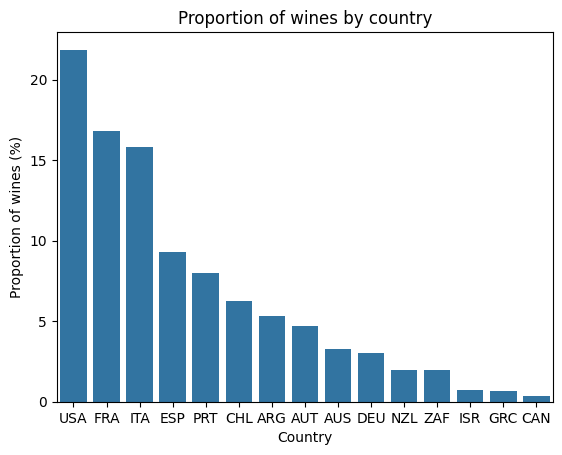

In [69]:
# Looking at the new distribution of wines by country

sns.barplot(x = names,
             y = 100*df['country'].value_counts()/len(df))

plt.xlabel('Country')
plt.ylabel('Proportion of wines (%)')
plt.title('Proportion of wines by country');

In [70]:
print(f"We now have {len(df)} wines in the dataset")

We now have 71459 wines in the dataset


# Inspecting the prices

In [71]:
print(f"{round(100*df['price'].isna().sum()/len(df), 2)}% of wines have no price")

8.11% of wines have no price


In [72]:
# Dropping wines with no prices

print(f"Before dropping null prices, we have {len(df)} wines")

df.dropna(subset = ['price'], inplace = True)

print(f"After dropping null prices, we have {len(df)} wines")

Before dropping null prices, we have 71459 wines
After dropping null prices, we have 65663 wines


In [73]:
# Looking at the distribution of wine prices
df['price'].describe()

count    65663.000000
mean        41.865663
std         50.687930
min          4.000000
25%         18.000000
50%         30.000000
75%         50.000000
max       2500.000000
Name: price, dtype: float64

In [76]:
print(f"99% of wines are below ${df['price'].quantile(0.985)}")

99% of wines are below $169.0


In [77]:
# Dropping the top 1.5% most expensive wines

df = df[df['price'] <= 169.0]

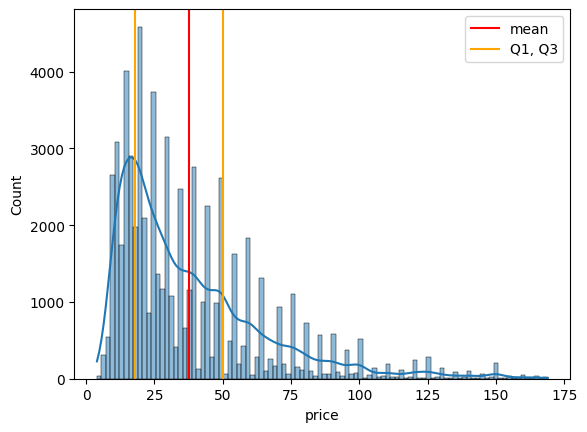

In [78]:
# Looking at the new price distribution

sns.histplot(data = df,
             x = 'price',
             bins = 100,
             kde = True)

plt.axvline(df['price'].mean(),
            color = 'red',
            label = 'mean')

plt.axvline(df['price'].quantile(0.25),
            color = 'orange',
            label = 'Q1, Q3')
plt.axvline(df['price'].quantile(0.75),
            color = 'orange')

plt.legend();

# Inspecting wine varieties

In [79]:
print(f"We have {len(df['variety'].unique())} unique varieties of wine")
print(f"{df['variety'].isna().sum()} wines have no variety")

We have 551 unique varieties of wine
1 wines have no variety


In [80]:
# Dropping wines with null variety
df.dropna(subset = ['variety'], inplace = True)

print(f"We now have {len(df['variety'].unique())} unique varieties of wine")

We now have 550 unique varieties of wine


In [81]:
 print(f"{(df['variety'].value_counts() == 1).sum()} wines show up only once")

110 wines show up only once


Plotting the distribution of the top 88.36% of wine varities


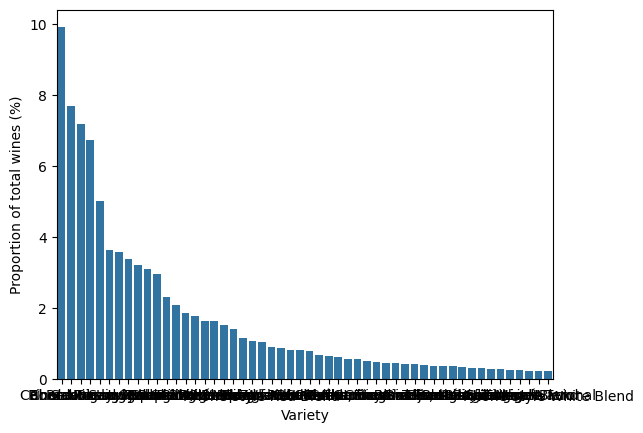

In [82]:
print(f"Plotting the distribution of the top {round(100*df['variety'].value_counts()[df['variety'].value_counts() > 150].sum()/len(df), 2)}% of wine varities")

sns.barplot(round(100*df['variety'].value_counts()[df['variety'].value_counts() > 150]/len(df), 2))

plt.xlabel('Variety')
plt.ylabel('Proportion of total wines (%)');

In [89]:
print('The top 10 most represented wines are:')

top_10_wines = list(df['variety'].value_counts()[:10].index)

for name in top_10_wines:
    print(f"{top_10_wines.index(name)+1}: {name}")

The top 10 most represented wines are:
1: Pinot Noir
2: Chardonnay
3: Red Blend
4: Cabernet Sauvignon
5: Riesling
6: Sauvignon Blanc
7: Bordeaux-style Red Blend
8: Portuguese Red
9: Syrah
10: Malbec


The top 5 wines are overrepresented, so I'm going to cut them down so that they are roughly in line with the next 5

In [112]:
# Finding the proportion for the top 5 wines to cut

prop_six = 100*df[df['variety'] == 'Sauvignon Blanc']['points'].count()/len(df)



props = [(100*df[df['variety'] == top_10_wines[:5][i]]['points'].count()/len(df))/(prop_six) for i in range(5)]
quants = [round(1 - (1/props[i]), 2) for i in range(5)]

for i in range(5):
    print(f"Proportion for {top_10_wines[i]}: {quants[i]}")

Proportion for Pinot Noir: 0.63
Proportion for Chardonnay: 0.53
Proportion for Red Blend: 0.49
Proportion for Cabernet Sauvignon: 0.46
Proportion for Riesling: 0.28


In [113]:
# Cutting the quantiles to cut

qs = [df[df['variety'] == top_10_wines[i]]['points'].quantile(quants[i]) for i in range(5)]

for i in range(5):
    print(f"{top_10_wines[i]}: {qs[i]}")

Pinot Noir: 92.0
Chardonnay: 91.0
Red Blend: 90.0
Cabernet Sauvignon: 91.0
Riesling: 89.0


In [114]:
# Dropping the lowest-scoring wines for each of the top 5 varieties

for i in range(5):
    indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)
    df.drop(index = indices, inplace = True)

/tmp/ipykernel_32501/1548620025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)
/tmp/ipykernel_32501/1548620025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)
/tmp/ipykernel_32501/1548620025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)
/tmp/ipykernel_32501/1548620025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)
/tmp/ipykernel_32501/1548620025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = list(df[df['variety'] == top_10_wines[i]][df['points'] < qs[i]].index)


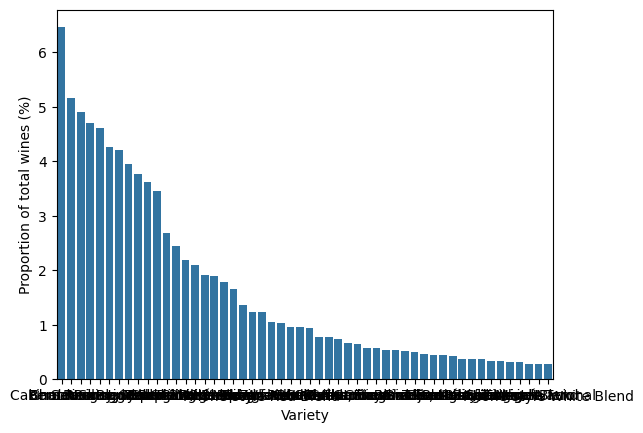

In [115]:
# Plotting the new distribution of wines by variety

sns.barplot(round(100*df['variety'].value_counts()[df['variety'].value_counts() > 150]/len(df), 2))

plt.xlabel('Variety')
plt.ylabel('Proportion of total wines (%)');

In [116]:
print(f"We now have {len(df)} wines in the dataset")

We now have 55350 wines in the dataset


# Saving this data

In [118]:
df.to_csv('../data/really_cleaned_wine_data.csv', index = False)

# Feature engineering: Adding coordinates

In [32]:
# Checking that every wine has a region and country

print(f"{df['country'].isna().sum()} wines have no country")
print(f"{df['region'].isna().sum()} wines have no region")

0 wines have no country
0 wines have no region


In [33]:
# Saving the DataFrame as a csv file

df.to_csv('../data/cleaned_wine_data.csv', index = True)

In [35]:
to_check = df.iloc[73976:]

In [36]:
to_check.to_csv('../data/remaining_rows_for_API.csv', index = True)

In [37]:
df.head()

,country,description,points,price,province,region,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [38]:
df.reset_index(inplace = True)

In [39]:
df.head()

,index,country,description,points,price,province,region,title,variety,winery
0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
